In [4]:
import numpy as np
import pandas as pd

from IPython.display import Markdown as md

In [5]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

![](./1.jpg)

# EDA(Exploratory Data Analysis) pipeine 만들기
#### 목적
#### 변수 간 트렌드, 패턴, 관계 등을 찾기
#### 데이터 분석 프로젝트 초기에 가설을 수립하기 위해 사용
#### 데이터 분석 프로젝트 초기에 적절한 모델 및 기법의 선정

In [5]:
patient_df = pd.read_csv('final_dataset_2.6.csv', encoding='cp949')
patient_df

,confirmed_date,region,patient_id,global_num,sex,birth_year,age,country,disease,infection_case,...,ave_wind_speed_m.s,max_wind_direction_deg,Num_Covid,Area_code,SO2max,COmax,O3max,NO2max,PM10max,PM25max
0,20200120,인천_부평구,1400000001,1.0,female,1985.0,30s,China,NaN,overseas inflow,...,0.8,246.2,0,823803,0.005,0.9,0.030,0.053,70,50
1,20200123,서울_강서구,1000000001,2.0,male,1964.0,50s,Korea,NaN,overseas inflow,...,1.8,0.0,0,111212,0.014,1.2,0.049,0.059,88,49
2,20200126,경기_고양시,2000000001,3.0,male,1966.0,50s,Korea,NaN,overseas inflow,...,1.0,84.4,0,131383,0.004,0.8,0.018,0.036,56,36
3,20200127,경기_평택시,2000000002,4.0,male,1964.0,50s,Korea,NaN,overseas inflow,...,2.0,47.8,0,131342,0.003,0.2,0.040,0.015,14,4
4,20200130,서울_중랑구,1000000002,5.0,male,1987.0,30s,Korea,NaN,overseas inflow,...,1.6,340.3,1,111151,0.003,0.7,0.026,0.044,27,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,20200428,충남_천안시,4100000143,NaN,male,1981.0,30s,Korea,NaN,overseas inflow,...,1.6,245.3,0,534115,0.005,0.5,0.066,0.033,46,29
3244,20200429,경기_성남시,2000000677,NaN,female,1999.0,20s,Korea,NaN,overseas inflow,...,0.9,182.8,0,131121,0.004,0.6,0.091,0.035,54,39
3245,20200429,경북_안동시,6011000051,NaN,female,1980.0,40s,Korea,NaN,etc,...,1.2,191.4,0,437141,0.003,0.5,0.089,0.022,65,31
3246,20200429,경북_안동시,6011000052,NaN,female,2011.0,0s,Korea,NaN,etc,...,1.2,191.4,0,437141,0.003,0.5,0.089,0.022,65,31


In [18]:
patient_df.shape

(3248, 40)

In [7]:
patient_df.head(5)

,confirmed_date,region,patient_id,global_num,sex,birth_year,age,country,disease,infection_case,...,ave_wind_speed_m.s,max_wind_direction_deg,Num_Covid,Area_code,SO2max,COmax,O3max,NO2max,PM10max,PM25max
0,20200120,인천_부평구,1400000001,1.0,female,1985.0,30s,China,NaN,overseas inflow,...,0.8,246.2,0,823803,0.005,0.9,0.030,0.053,70,50
1,20200123,서울_강서구,1000000001,2.0,male,1964.0,50s,Korea,NaN,overseas inflow,...,1.8,0.0,0,111212,0.014,1.2,0.049,0.059,88,49
2,20200126,경기_고양시,2000000001,3.0,male,1966.0,50s,Korea,NaN,overseas inflow,...,1.0,84.4,0,131383,0.004,0.8,0.018,0.036,56,36
3,20200127,경기_평택시,2000000002,4.0,male,1964.0,50s,Korea,NaN,overseas inflow,...,2.0,47.8,0,131342,0.003,0.2,0.040,0.015,14,4
4,20200130,서울_중랑구,1000000002,5.0,male,1987.0,30s,Korea,NaN,overseas inflow,...,1.6,340.3,1,111151,0.003,0.7,0.026,0.044,27,10


In [8]:
patient_df.tail(5)

,confirmed_date,region,patient_id,global_num,sex,birth_year,age,country,disease,infection_case,...,ave_wind_speed_m.s,max_wind_direction_deg,Num_Covid,Area_code,SO2max,COmax,O3max,NO2max,PM10max,PM25max
3243,20200428,충남_천안시,4100000143,NaN,male,1981.0,30s,Korea,NaN,overseas inflow,...,1.6,245.3,0,534115,0.005,0.5,0.066,0.033,46,29
3244,20200429,경기_성남시,2000000677,NaN,female,1999.0,20s,Korea,NaN,overseas inflow,...,0.9,182.8,0,131121,0.004,0.6,0.091,0.035,54,39
3245,20200429,경북_안동시,6011000051,NaN,female,1980.0,40s,Korea,NaN,etc,...,1.2,191.4,0,437141,0.003,0.5,0.089,0.022,65,31
3246,20200429,경북_안동시,6011000052,NaN,female,2011.0,0s,Korea,NaN,etc,...,1.2,191.4,0,437141,0.003,0.5,0.089,0.022,65,31
3247,20200429,경북_안동시,6011000053,NaN,female,2001.0,10s,Korea,NaN,etc,...,1.2,191.4,0,437141,0.003,0.5,0.089,0.022,65,31


In [9]:
patient_df['sex'][500] #데이터 프레임이 잘불려왔는지 확인하기 위해서 랜덤하게 sex컬럼에 555번째 값 추출

'female'

In [10]:
# for column in patient_df:
#     print(column)

In [19]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   confirmed_date          3248 non-null   int64  
 1   region                  3248 non-null   object 
 2   patient_id              3248 non-null   int64  
 3   global_num              2137 non-null   float64
 4   sex                     3181 non-null   object 
 5   birth_year              2812 non-null   float64
 6   age                     3174 non-null   object 
 7   country                 3248 non-null   object 
 8   disease                 9 non-null      object 
 9   infection_case          2515 non-null   object 
 10  infection_order         29 non-null     float64
 11  infected_by             808 non-null    float64
 12  contact_number          625 non-null    float64
 13  symptom_onset_date      457 non-null    object 
 14  released_date           1305 non-null   

# Describe the Data

### 변수 설명
#### confirmed_date : 코로나19 확진날짜
#### region : 확진 받은 장소
#### patient_id : 환자 고유번호
#### global_num : 국제 감염수
#### sex : 성별
#### birth_year : 츨생년도
#### age : 나이
#### country : 국적
#### disease : 질별 유무
#### infection_case : 감염경로
#### infection_order : 감염 순서
#### infected_by : 감염경로
#### contact_number : 접촉 횟수
#### symptom_onset_date : 증상발병 날짜
#### released_date : 격리해제 날짜
#### deceased_date : 사망 날짜
#### state : 상태 (released, isolated, deceased)
#### sunshine_hr : 가조시간.hr
#### total_suntime_hr : 합계.일조시간.hr
#### sun_time_hhmi : 시간.최다일사.시각.hhmi
#### sun_amount_MJ_m2 : 시간.최다일사량.MJ.m2
#### total_sun_amount_MJ_m2 : 합계.일사량.MJ.m2
#### ave_tem : 평균기온.C
#### mini_tem : 최저기온.C
#### mini_tem_hhmi : 최저기온.시각.hhmi
#### max_tem : 최고기온.C.
#### max_tem_hhmi : 최고기온.시각.hhmi.
#### day_prec_mm : 일강수량.mm.
#### max_wind_speed_m.s : 최대.순간.풍속.m.s.
#### max_wind_speed_hhmi : 최대.순간풍속.시각.hhmi.
#### ave_wind_speed_m.s : 평균.풍속.m.s.
#### max_wind_direction_deg : 최대.순간.풍속.풍향.deg.
#### Num_Covid : 일별 확진자 수
#### Area_code : 지역 코드
#### SO2max : 아황산가스 (ppm)
#### COmax : 일산화탄소 (ppm)
#### O3max : 오존 (ppm)
#### NO2max : 이산화질소 (ppm)
#### PM10max : PM10 (㎍/㎥)
#### PM25max : PM2.5 (㎍/㎥)

In [67]:
patient_df.describe().round(2)

,confirmed_date,patient_id,Age,global_num,birth_year,infection_order,infected_by,contact_number,sunshine_hr,total_suntime_hr,...,ave_wind_speed_m.s,max_wind_direction_deg,Num_Covid,Area_code,SO2max,COmax,O3max,NO2max,PM10max,PM25max
count,3248.00,3.248000e+03,2812.00,2137.00,2812.00,29.00,8.080000e+02,625.00,3248.00,3248.00,...,3248.00,3248.00,3248.00,3248.00,3248.00,3248.00,3248.00,3248.00,3248.00,3248.00
mean,20200303.57,3.601882e+09,45.82,6783.04,1975.18,2.48,2.694491e+09,15.88,11.86,6.87,...,1.79,218.06,7.43,321063.25,0.01,0.62,0.05,0.03,63.89,36.96
std,59.07,2.190480e+09,20.25,3263.48,20.25,1.45,1.743860e+09,56.07,0.61,4.21,...,0.96,99.13,17.07,185845.32,0.01,0.20,0.01,0.02,28.35,16.13
min,20200120.00,1.000000e+09,1.00,1.00,1916.00,1.00,1.000000e+09,0.00,10.10,0.00,...,0.30,0.00,0.00,111122.00,0.00,0.10,0.01,0.00,12.00,4.00
25%,20200229.00,1.475000e+09,27.00,4625.00,1961.00,1.00,1.300000e+09,2.00,11.40,2.80,...,1.10,143.40,0.00,131341.00,0.00,0.50,0.04,0.02,43.00,25.00
50%,20200308.00,3.001000e+09,46.00,7928.00,1975.00,2.00,2.000000e+09,4.00,11.70,8.85,...,1.60,247.50,1.00,437114.50,0.00,0.60,0.05,0.03,58.00,36.00
75%,20200325.00,6.001001e+09,60.00,9459.00,1994.00,3.00,4.100000e+09,13.00,12.30,10.52,...,2.20,298.10,4.00,437171.00,0.00,0.70,0.05,0.04,82.00,45.00
max,20200429.00,7.000000e+09,105.00,10758.00,2020.00,6.00,7.000000e+09,1091.00,13.70,12.50,...,7.30,357.50,92.00,823803.00,0.14,2.80,0.10,0.11,267.00,134.00


In [13]:
patient_df.describe(include='object').round(2)

,region,sex,age,country,disease,infection_case,symptom_onset_date,released_date,deceased_date,state
count,3248,3181,3174,3248,9,2515,457,1305,43,3248
unique,119,2,11,12,1,23,72,75,29,3
top,경북_경산시,female,20s,Korea,True,contact with patient,2020-02-27,2020-03-20,2020-02-23,released
freq,632,1791,770,3222,9,952,29,70,4,1818


# Gather Data by Type
###### 독립변수의 종류에는 범주형과 숫자형 두 가지.
###### 예측하고자하는 것이 사망률 ->숫자형이므로 범주형 변수와 사망률의 관계, 숫자형 변수와 사망률의 관계
###### 전자는 boxplot이 유용할 것 같고, 후자는 scatter plot이 유용함

In [7]:
numeric_feature = patient_df.columns[(patient_df.dtypes==int) | (patient_df.dtypes== float)]
categorical_feature = patient_df.columns[patient_df.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['global_num', 'birth_year', 'infection_order', 'infected_by', 'contact_number', 'sunshine_hr', 'total_suntime_hr', 'sun_amount_MJ_m2', 'total_sun_amount_MJ_m2', 'ave_tem', 'mini_tem', 'max_tem', 'day_prec_mm', 'max_wind_speed_m.s', 'ave_wind_speed_m.s', 'max_wind_direction_deg', 'SO2max', 'COmax', 'O3max', 'NO2max']
카테고리형 데이터는 다음과 같습니다. 
 ['region', 'sex', 'age', 'country', 'disease', 'infection_case', 'symptom_onset_date', 'released_date', 'deceased_date', 'state']


In [ ]:
# global_num', 'birth_year', 'infection_order', 'infected_by', 'contact_number' 은 수치형이 아님

In [24]:
numeric_feature = patient_df.select_dtypes(include=['int64'])
numeric_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   confirmed_date       3248 non-null   int64
 1   patient_id           3248 non-null   int64
 2   sun_time_hhmi        3248 non-null   int64
 3   mini_tem_hhmi        3248 non-null   int64
 4   max_tem_hhmi         3248 non-null   int64
 5   max_wind_speed_hhmi  3248 non-null   int64
 6   Num_Covid            3248 non-null   int64
 7   Area_code            3248 non-null   int64
 8   PM10max              3248 non-null   int64
 9   PM25max              3248 non-null   int64
dtypes: int64(10)
memory usage: 253.9 KB


In [25]:
categorical_feature = patient_df.select_dtypes(include=['object'])
categorical_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   region              3248 non-null   object
 1   sex                 3181 non-null   object
 2   age                 3174 non-null   object
 3   country             3248 non-null   object
 4   disease             9 non-null      object
 5   infection_case      2515 non-null   object
 6   symptom_onset_date  457 non-null    object
 7   released_date       1305 non-null   object
 8   deceased_date       43 non-null     object
 9   state               3248 non-null   object
dtypes: object(10)
memory usage: 253.9+ KB


# Show Categorical Counts

In [26]:
for colname in categorical_feature.columns:
    print (colname)
    print (categorical_feature[colname].value_counts(), '\n')

region
경북_경산시    632
경기_성남시    189
경기_용인시    118
충남_천안시    108
경기_평택시     99
         ... 
강원_인제군      1
경남_산청군      1
강원_삼척시      1
충북_진천군      1
경남_함안군      1
Name: region, Length: 119, dtype: int64 

sex
female    1791
male      1390
Name: sex, dtype: int64 

age
20s     770
50s     574
40s     438
30s     422
60s     385
70s     193
80s     150
10s     145
0s       53
90s      43
100s      1
Name: age, dtype: int64 

country
Korea            3222
China              10
United States       6
Thailand            2
Canada              1
France              1
Spain               1
Switzerland         1
Indonesia           1
Germany             1
Vietnam             1
Mongolia            1
Name: country, dtype: int64 

disease
True    9
Name: disease, dtype: int64 

infection_case
contact with patient                     952
etc                                      554
overseas inflow                          547
Guro-gu Call Center                      109
Shincheonji Church            

# Check Missing Values

In [27]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(patient_df)

결측치가 있는 컬럼은: global_num입니다
해당 컬럼에 총 1111개의 결측치가 존재합니다.
결측치가 있는 컬럼은: sex입니다
해당 컬럼에 총 67개의 결측치가 존재합니다.
결측치가 있는 컬럼은: birth_year입니다
해당 컬럼에 총 436개의 결측치가 존재합니다.
결측치가 있는 컬럼은: age입니다
해당 컬럼에 총 74개의 결측치가 존재합니다.
결측치가 있는 컬럼은: disease입니다
해당 컬럼에 총 3239개의 결측치가 존재합니다.
결측치가 있는 컬럼은: infection_case입니다
해당 컬럼에 총 733개의 결측치가 존재합니다.
결측치가 있는 컬럼은: infection_order입니다
해당 컬럼에 총 3219개의 결측치가 존재합니다.
결측치가 있는 컬럼은: infected_by입니다
해당 컬럼에 총 2440개의 결측치가 존재합니다.
결측치가 있는 컬럼은: contact_number입니다
해당 컬럼에 총 2623개의 결측치가 존재합니다.
결측치가 있는 컬럼은: symptom_onset_date입니다
해당 컬럼에 총 2791개의 결측치가 존재합니다.
결측치가 있는 컬럼은: released_date입니다
해당 컬럼에 총 1943개의 결측치가 존재합니다.
결측치가 있는 컬럼은: deceased_date입니다
해당 컬럼에 총 3205개의 결측치가 존재합니다.


In [70]:
for col in patient_df.columns:
    msg = 'column: {:>20}\t NaN 값 퍼센트 : {:.2f}%'.format(col, 100 * (patient_df[col].isnull().sum() / patient_df[col].shape[0]))
    print(msg)

column:       confirmed_date	 NaN 값 퍼센트 : 0.00%
column:               region	 NaN 값 퍼센트 : 0.00%
column:           patient_id	 NaN 값 퍼센트 : 0.00%
column:                  Age	 NaN 값 퍼센트 : 13.42%
column:           global_num	 NaN 값 퍼센트 : 34.21%
column:                  sex	 NaN 값 퍼센트 : 2.06%
column:           birth_year	 NaN 값 퍼센트 : 13.42%
column:                  age	 NaN 값 퍼센트 : 2.28%
column:              country	 NaN 값 퍼센트 : 0.00%
column:              disease	 NaN 값 퍼센트 : 99.72%
column:       infection_case	 NaN 값 퍼센트 : 22.57%
column:      infection_order	 NaN 값 퍼센트 : 99.11%
column:          infected_by	 NaN 값 퍼센트 : 75.12%
column:       contact_number	 NaN 값 퍼센트 : 80.76%
column:   symptom_onset_date	 NaN 값 퍼센트 : 85.93%
column:        released_date	 NaN 값 퍼센트 : 59.82%
column:        deceased_date	 NaN 값 퍼센트 : 98.68%
column:                state	 NaN 값 퍼센트 : 0.00%
column:          sunshine_hr	 NaN 값 퍼센트 : 0.00%
column:     total_suntime_hr	 NaN 값 퍼센트 : 0.00%
column:        sun_time_hhmi	

<AxesSubplot:>

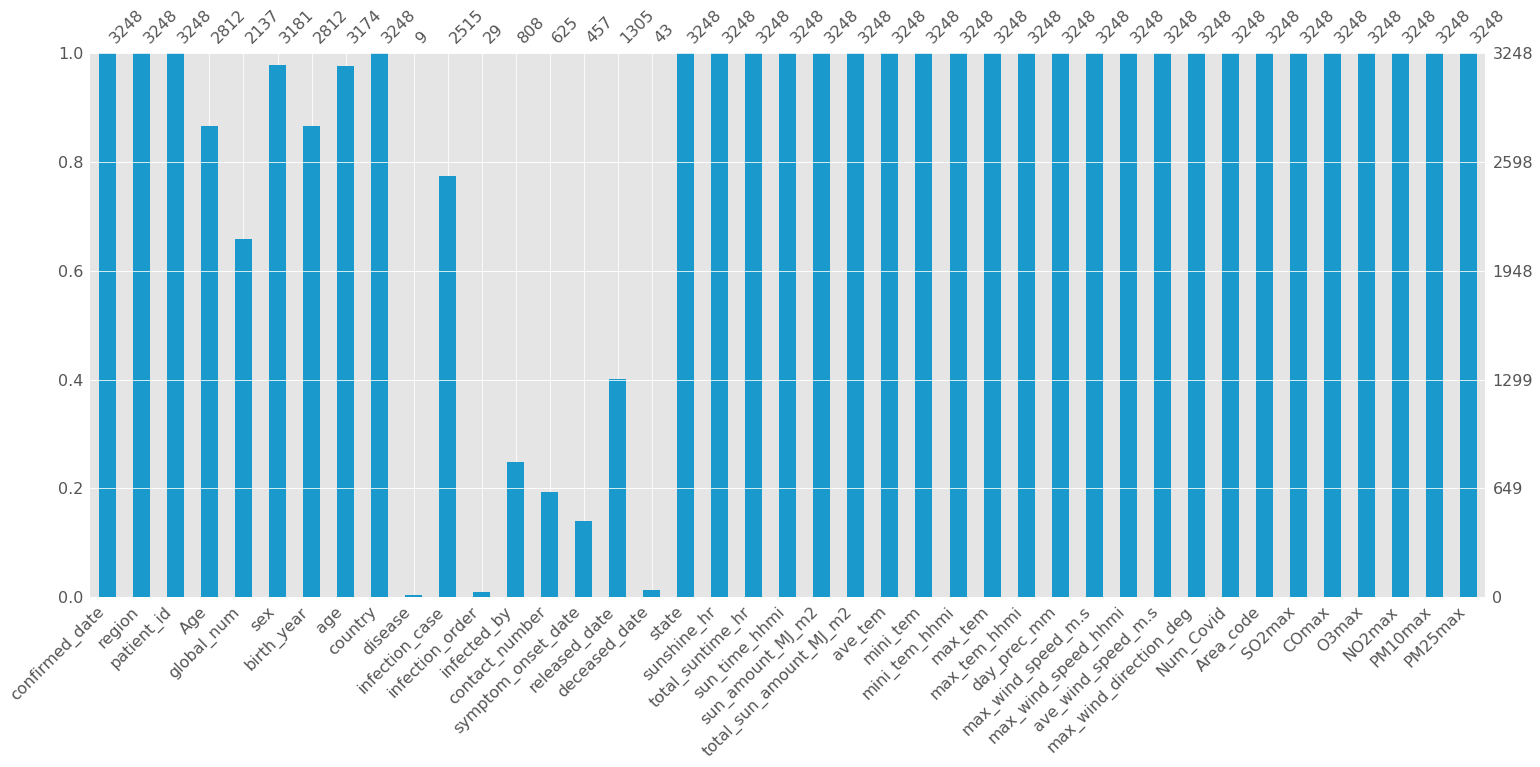

In [56]:
import missingno as msno
msno.bar(df=patient_df.iloc[:, :], color=(0.1, 0.6, 0.8))

# Data visualization
#### Boxplot을 사용해서 numeric_feature 데이터의 분포를 살펴보기

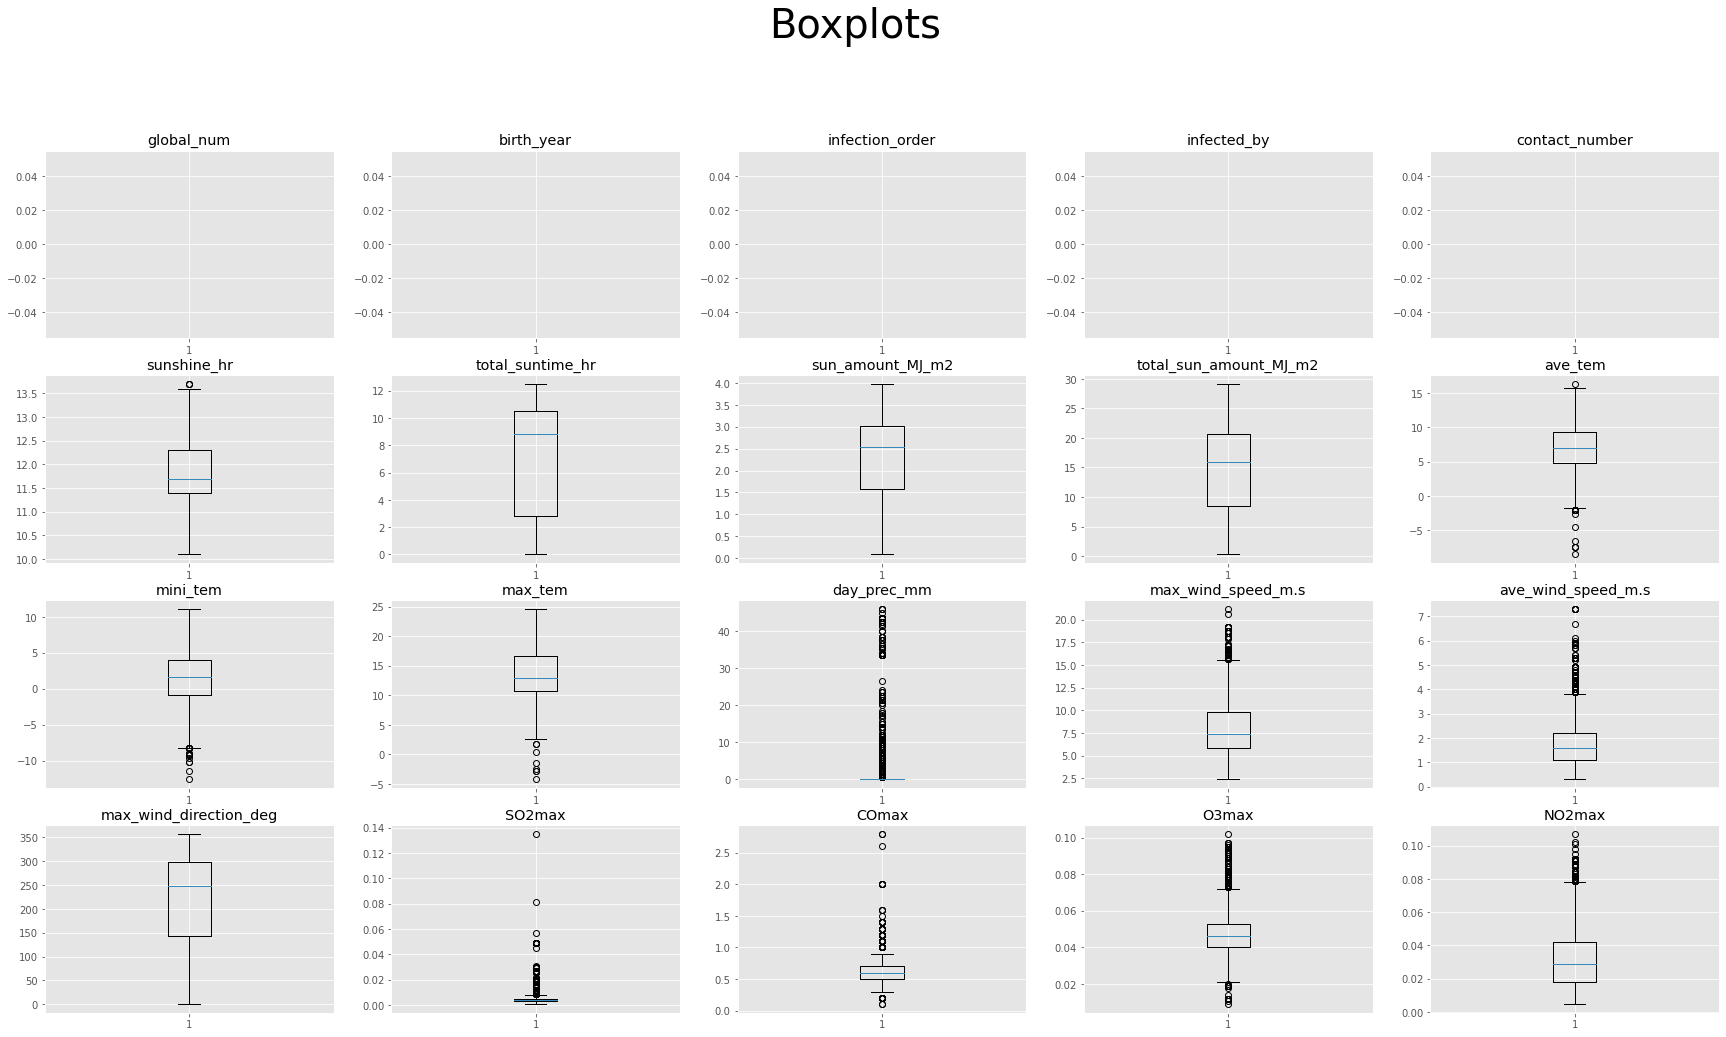

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

plt.figure(figsize=(30,20))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(5,5,i+1)
    plt.title(feature[i])
    plt.boxplot(patient_df[feature[i]])
plt.show()

#### 히스토그램 을 사용해서 categorical_feature 데이터의 분포를 살펴보기

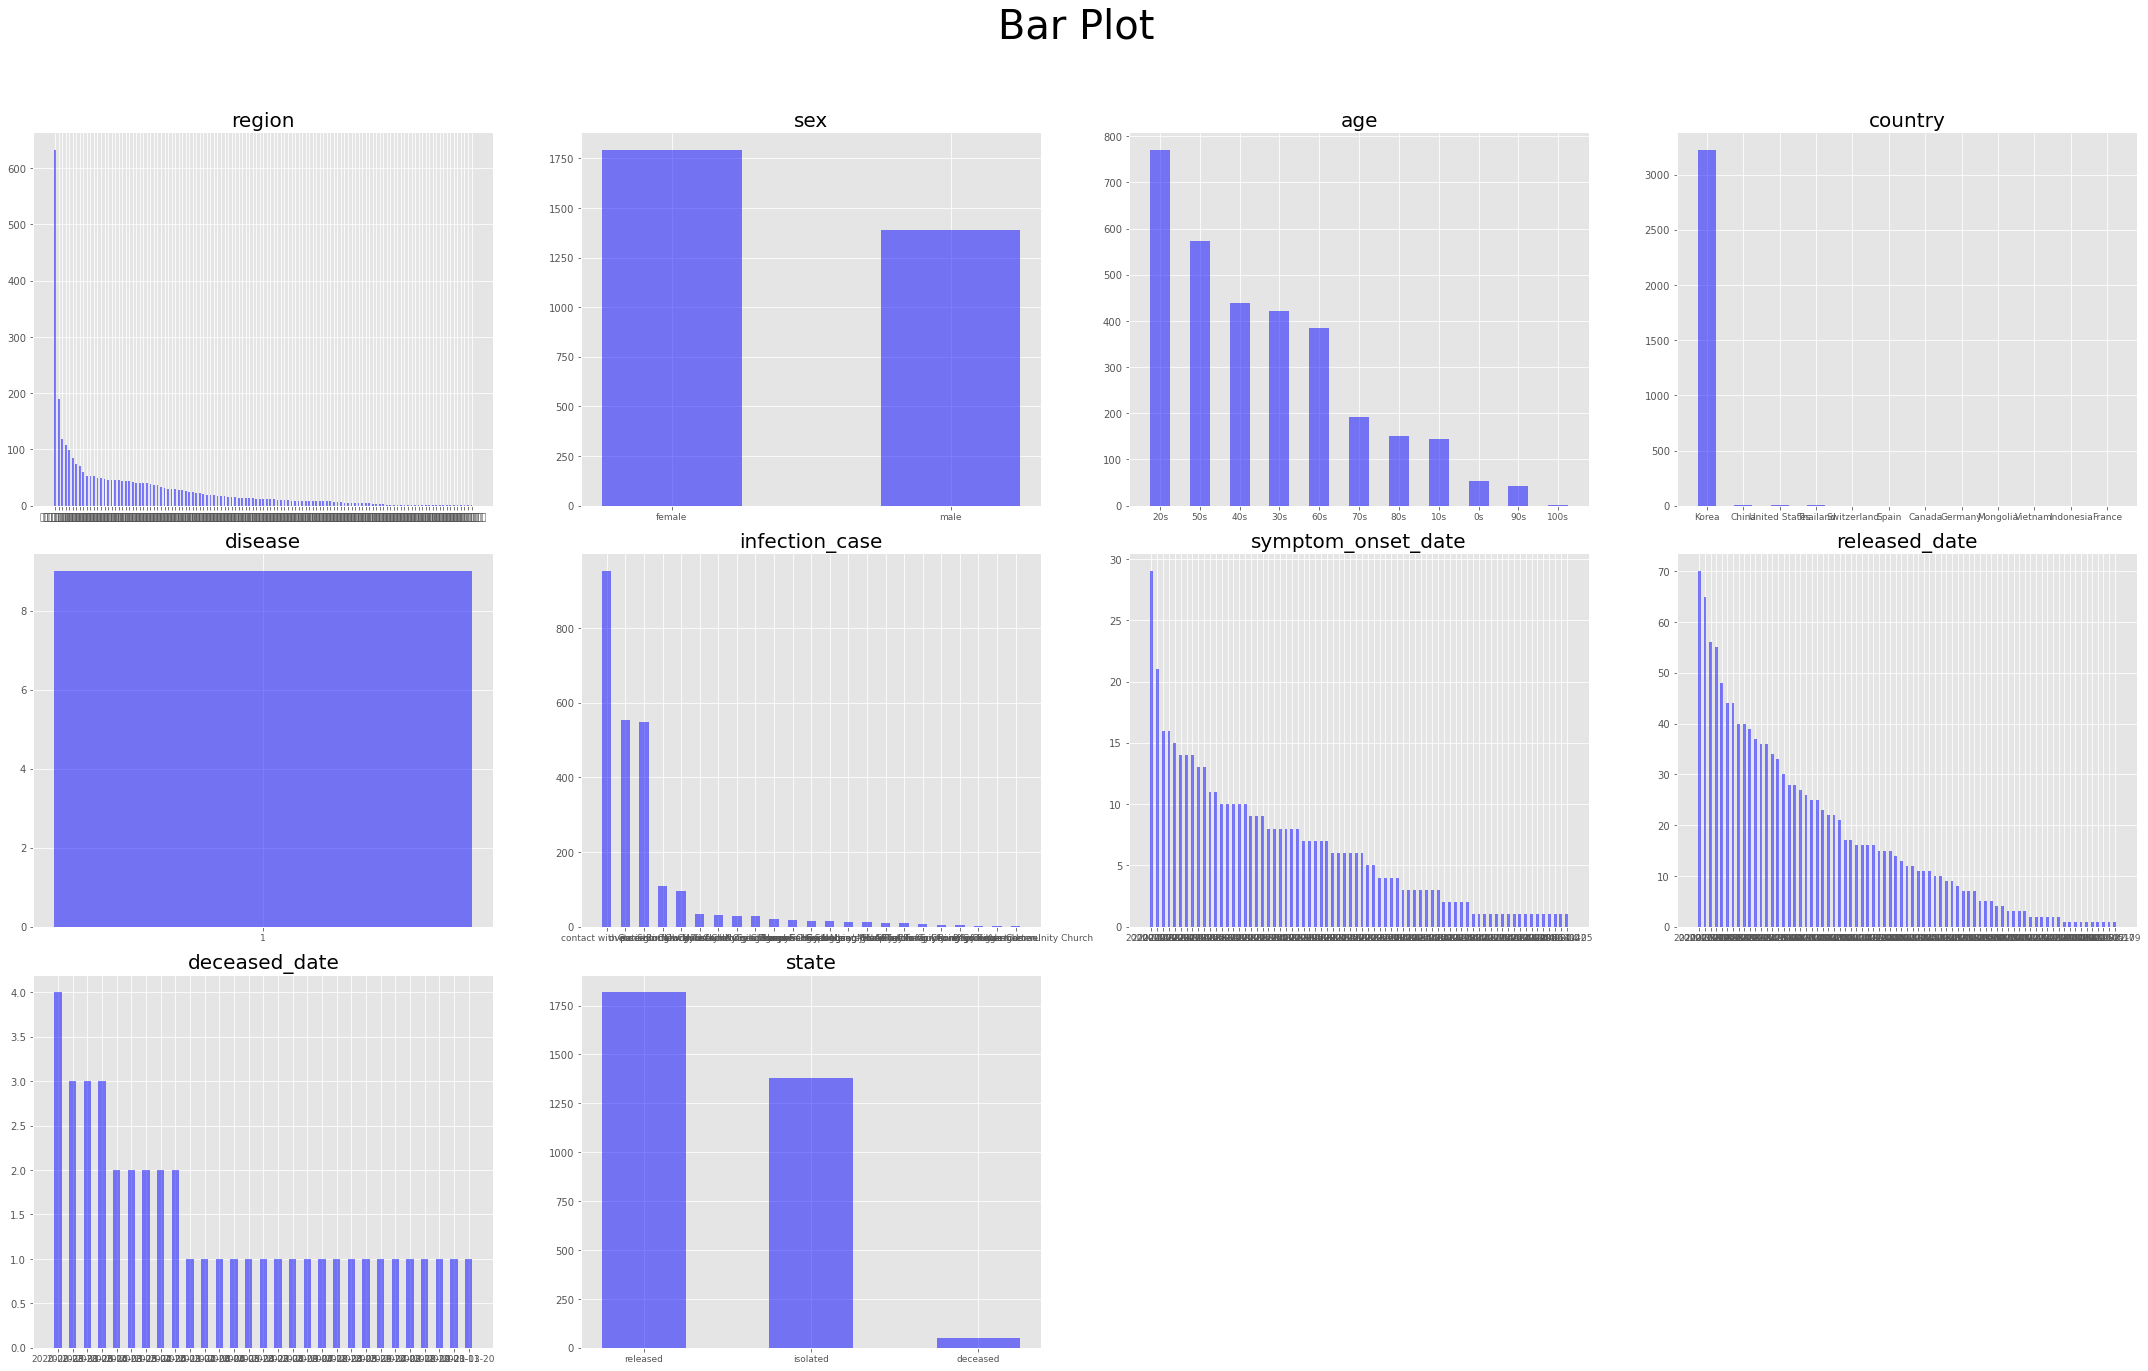

In [17]:
feature = categorical_feature

plt.figure(figsize=(30,20))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(3,4,i+1)
    plt.title(feature[i], fontsize=20)
    temp = patient_df[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=9)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### <font color=yellow>-> 20대 발생자가 가장 많음</font>
#### <font color=yellow>-> female 이 male 보다 많음</font>

#### 발병은 20대에서 제일 높은데 사망률은?

In [41]:
age_list = 2021 - patient_df['birth_year']
patient_df.insert(3, "Age", age_list)
patient_df

# 현재년도 2021에서 출생일을 빼서 현재 나이 계산

,confirmed_date,region,patient_id,Age,global_num,sex,birth_year,age,country,disease,...,ave_wind_speed_m.s,max_wind_direction_deg,Num_Covid,Area_code,SO2max,COmax,O3max,NO2max,PM10max,PM25max
0,20200120,인천_부평구,1400000001,36.0,1.0,female,1985.0,30s,China,NaN,...,0.8,246.2,0,823803,0.005,0.9,0.030,0.053,70,50
1,20200123,서울_강서구,1000000001,57.0,2.0,male,1964.0,50s,Korea,NaN,...,1.8,0.0,0,111212,0.014,1.2,0.049,0.059,88,49
2,20200126,경기_고양시,2000000001,55.0,3.0,male,1966.0,50s,Korea,NaN,...,1.0,84.4,0,131383,0.004,0.8,0.018,0.036,56,36
3,20200127,경기_평택시,2000000002,57.0,4.0,male,1964.0,50s,Korea,NaN,...,2.0,47.8,0,131342,0.003,0.2,0.040,0.015,14,4
4,20200130,서울_중랑구,1000000002,34.0,5.0,male,1987.0,30s,Korea,NaN,...,1.6,340.3,1,111151,0.003,0.7,0.026,0.044,27,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,20200428,충남_천안시,4100000143,40.0,NaN,male,1981.0,30s,Korea,NaN,...,1.6,245.3,0,534115,0.005,0.5,0.066,0.033,46,29
3244,20200429,경기_성남시,2000000677,22.0,NaN,female,1999.0,20s,Korea,NaN,...,0.9,182.8,0,131121,0.004,0.6,0.091,0.035,54,39
3245,20200429,경북_안동시,6011000051,41.0,NaN,female,1980.0,40s,Korea,NaN,...,1.2,191.4,0,437141,0.003,0.5,0.089,0.022,65,31
3246,20200429,경북_안동시,6011000052,10.0,NaN,female,2011.0,0s,Korea,NaN,...,1.2,191.4,0,437141,0.003,0.5,0.089,0.022,65,31


In [82]:
# patient_df['Age'].notnull()
# patient_df.isnull().sum()

In [42]:
age_state_df = patient_df.filter(['Age','state']).dropna()
age_state_df = pd.get_dummies(age_state_df)
age_state_df

,Age,state_deceased,state_isolated,state_released
0,36.0,0,0,1
1,57.0,0,0,1
2,55.0,0,0,1
3,57.0,0,0,1
4,34.0,0,0,1
...,...,...,...,...
3243,40.0,0,1,0
3244,22.0,0,1,0
3245,41.0,0,1,0
3246,10.0,0,1,0


In [43]:
age_list = age_state_df['Age'].unique()

In [44]:
state_deceased_list, state_isolated_list, state_released_list = [],[],[]

for age in age_list:
    state_deceased_list_i = age_state_df[age_state_df['Age']== age]['state_deceased'].sum()
    state_deceased_list.append(state_deceased_list_i)
    
    state_isolated_list_i = age_state_df[age_state_df['Age']== age]['state_isolated'].sum()
    state_isolated_list.append(state_isolated_list_i)
    
    state_released_list_i = age_state_df[age_state_df['Age']== age]['state_released'].sum()
    state_released_list.append(state_released_list_i)

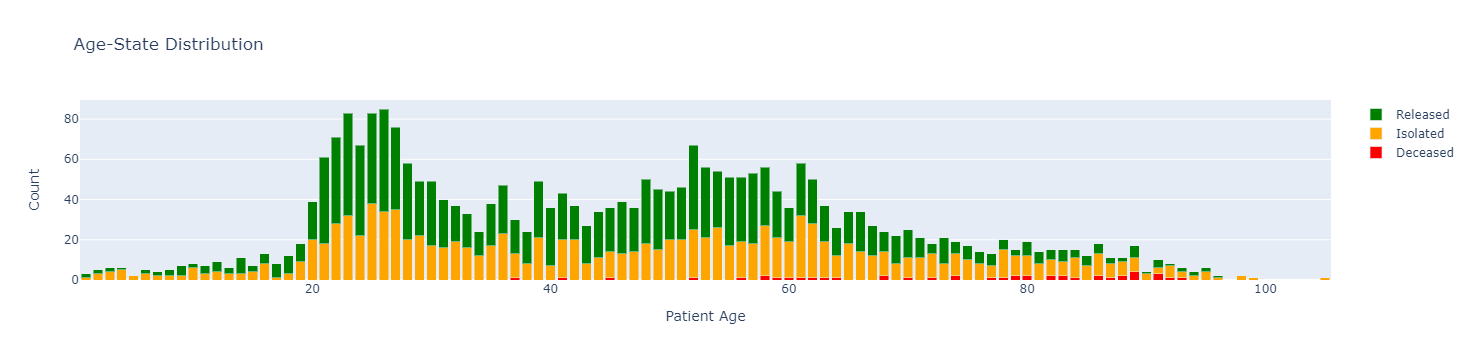

In [59]:
fig = go.Figure(data=[
    go.Bar(name='Deceased', x=age_list, y=state_deceased_list, marker_color='red'),
    go.Bar(name='Isolated', x=age_list, y=state_isolated_list, marker_color='orange'),
    go.Bar(name='Released', x=age_list, y=state_released_list, marker_color='green'),
])
# stack 모드로 barmode 바꿈
fig.update_layout(barmode='stack', title='Age-State Distribution', xaxis_title='Patient Age', yaxis_title='Count')
fig.show()

### <font color=yellow>->사망자 대부분은 50대 이상인것 확인</font>

#### 변수별 상관관계 알아보기 
##### 데이터 특성마다 상이한 Scaling 수행. (Sklearn 이용)
##### 범주형-> Label encoding (One hot encoding), 숫자형-> Scaling

In [46]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환
from sklearn.preprocessing import LabelEncoder

corr_df = patient_df.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

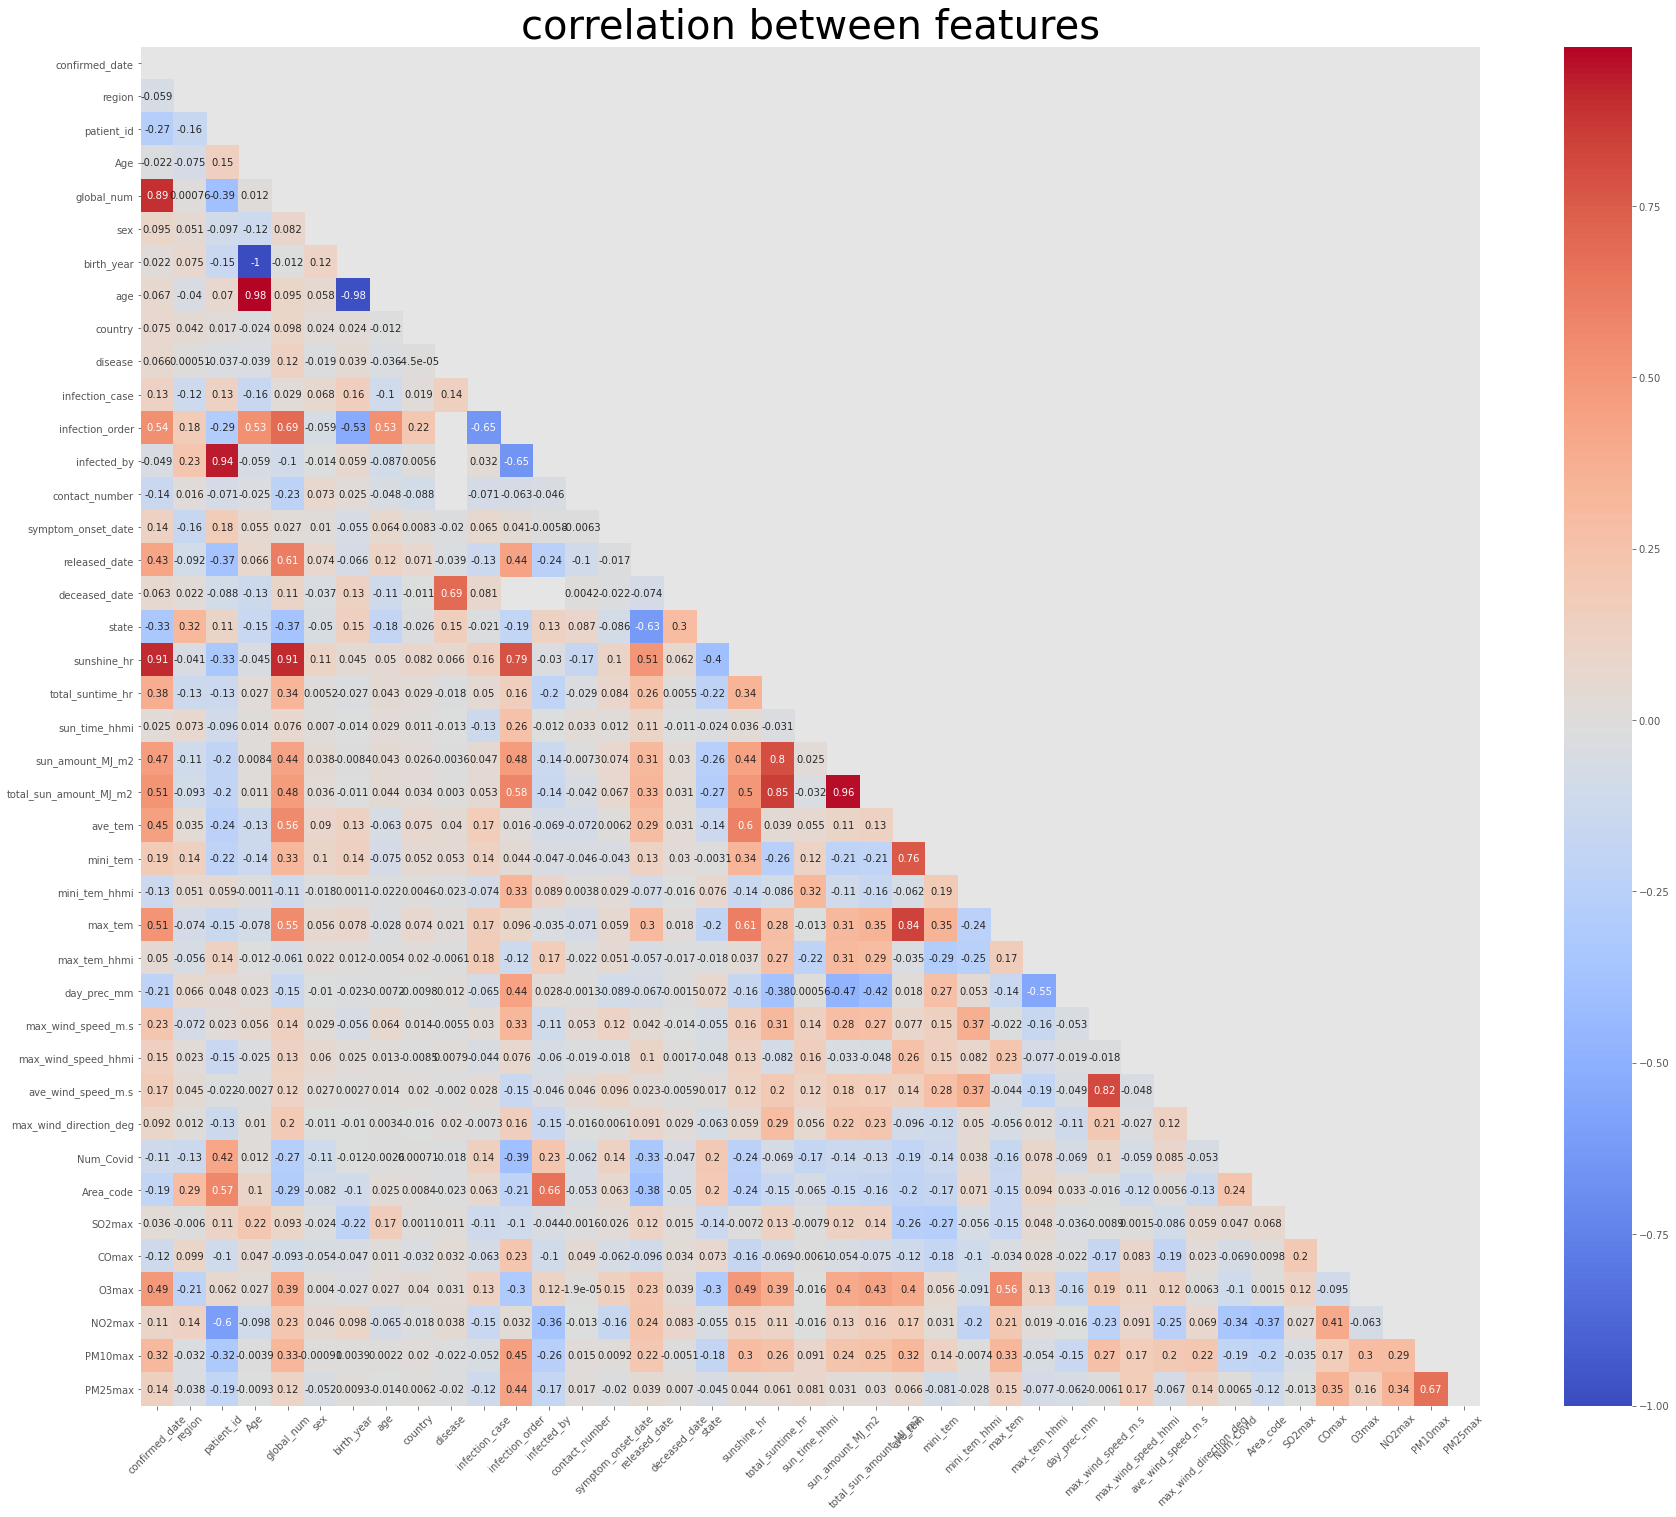

In [47]:
#상관관계 분석도
import seaborn as sns

plt.figure(figsize=(30,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=10, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=10)
plt.title('correlation between features', fontsize=40)
plt.show()

In [100]:
# patient_df_corr = patient_df.corr()
# patient_df_corr

# patient_df_corr.sort_values(by = ['PM10max'],
#                            axis = 0,
#                            ascending = False,
#                            inplace = False,
#                            kind = 'quicksort')

### Target과 다른 numeric_feature 들과의 관계 확인 하기
#### 수치형 feature를 시각화하기 위해 scatter plot을 이용

In [48]:
target = "PM10max"

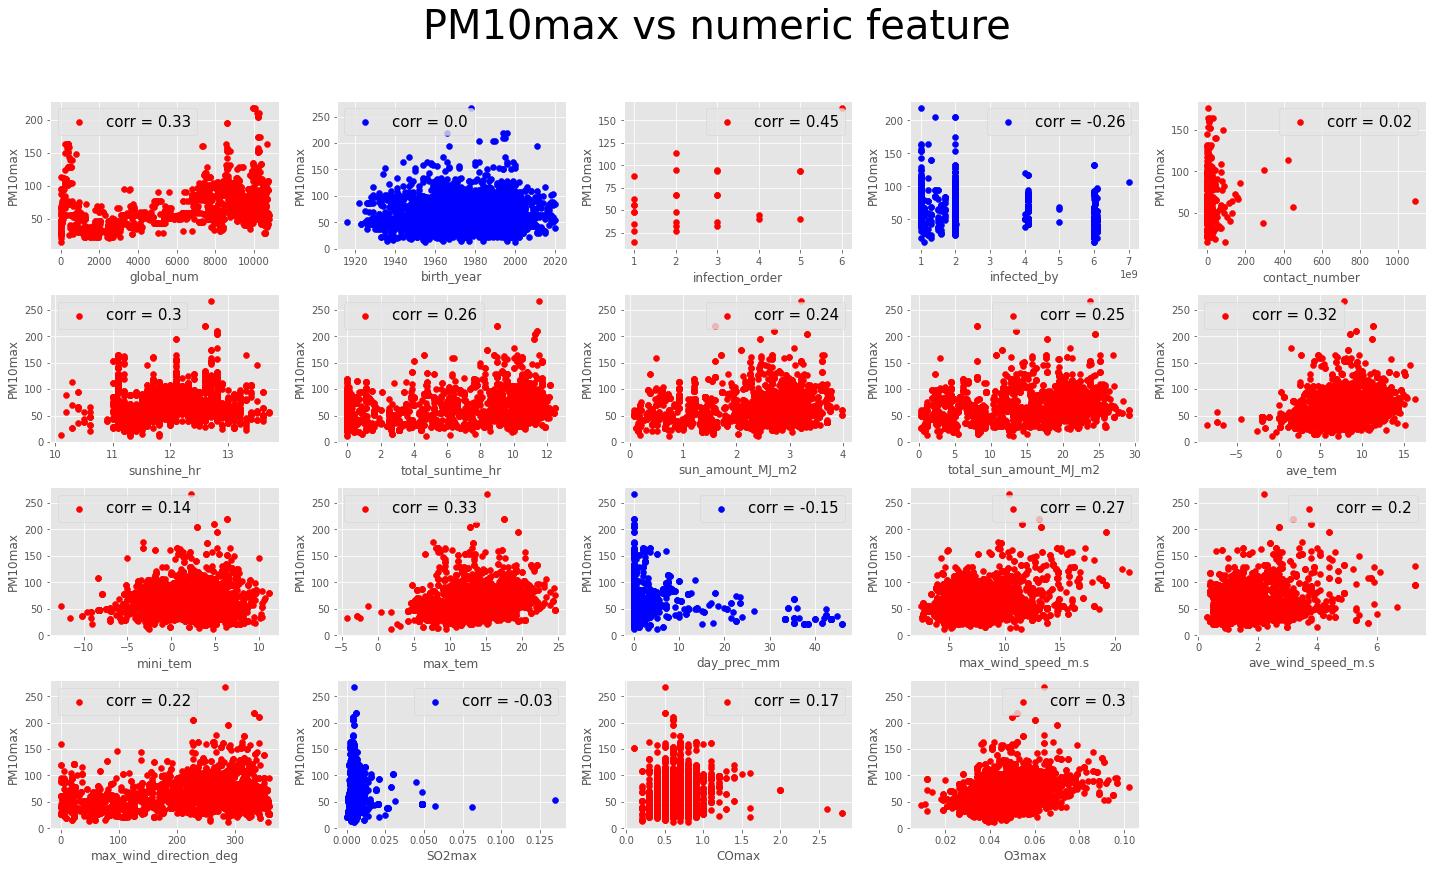

In [49]:
feature = numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("PM10max vs numeric feature", fontsize=40)

# id는 제외
for i in range(len(feature[:-1])):
    plt.subplot(5,5,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = patient_df[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(patient_df[feature[i]], patient_df[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Target과 categorical_feature 의 관계
#### 카테고리에 따른 Target feature의 분포를 살펴보기 위해 violin 그래프 사용

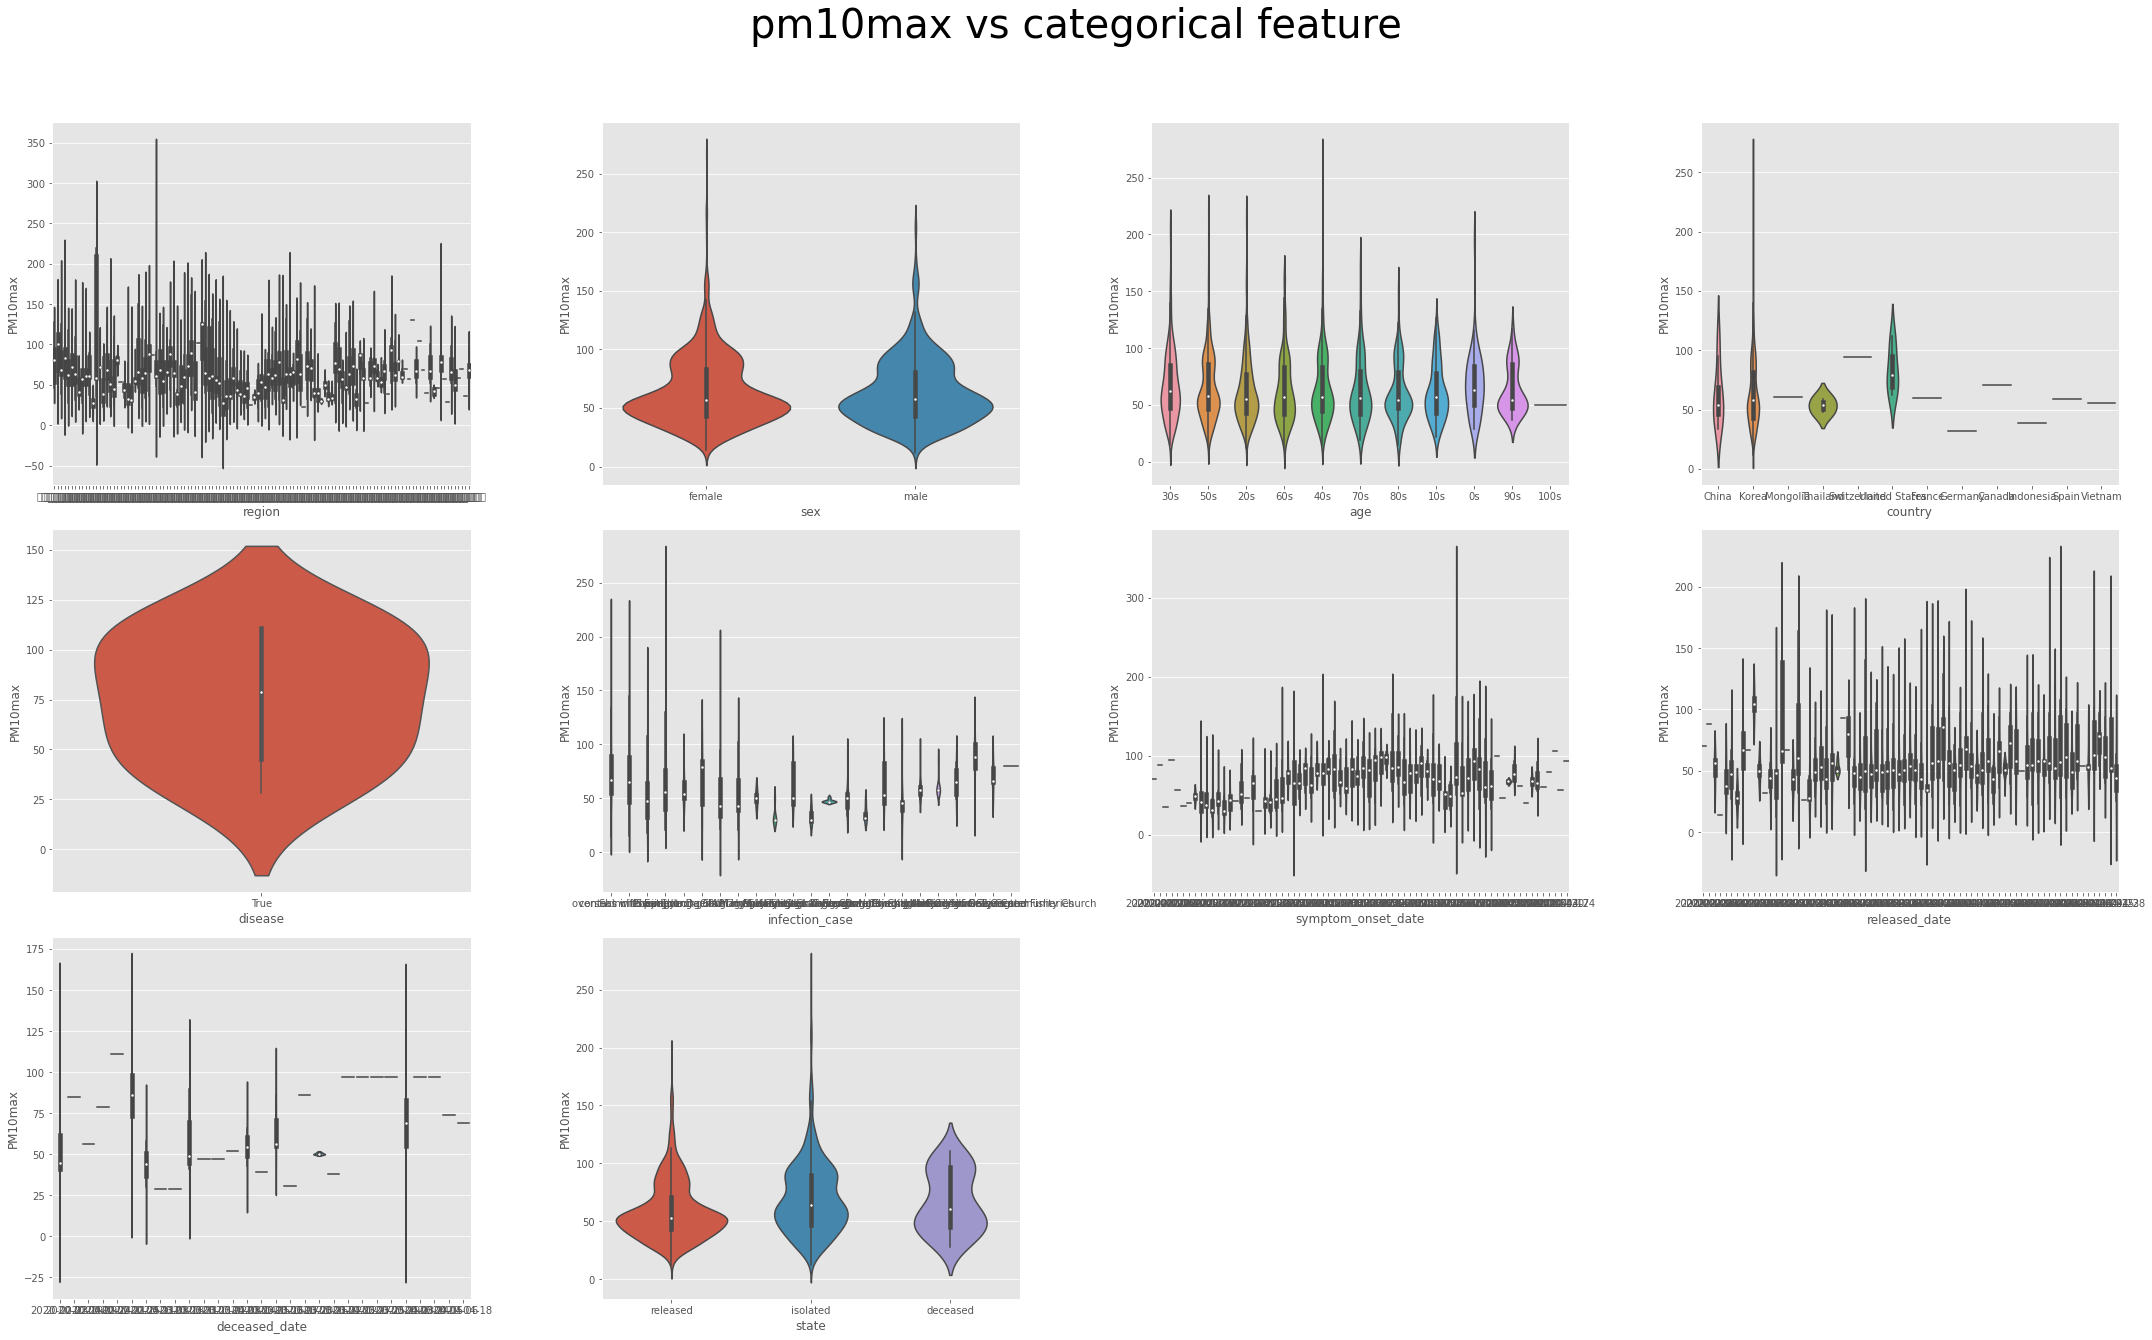

In [50]:
feature = categorical_feature

plt.figure(figsize=(30,25))
plt.suptitle("pm10max vs categorical feature", fontsize=40)

# id는 제외
for i in range(len(feature)):
    plt.subplot(4,4,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x= patient_df[feature[i]], y= patient_df[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
#카테고리에 따라 target feature pm10max 가 어느 정도 차이를 보이는지 알 수 있다. 

##### <font color=yellow>->pm10max vs 사망률 </font>

# Data visualization by columns(2)

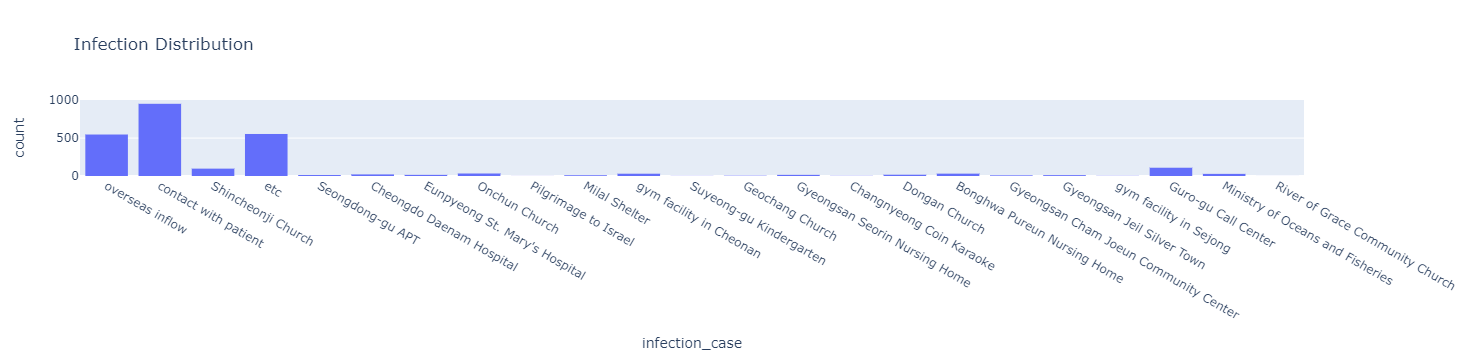

In [51]:
fig = px.histogram(patient_df, x="infection_case", title='Infection Distribution') #. update_xaxes(categoryorder = 'total descending')
fig.show()

##### <font color=yellow>->그룹별로 condense하기 ex) church, gym, hospital to one group </font>

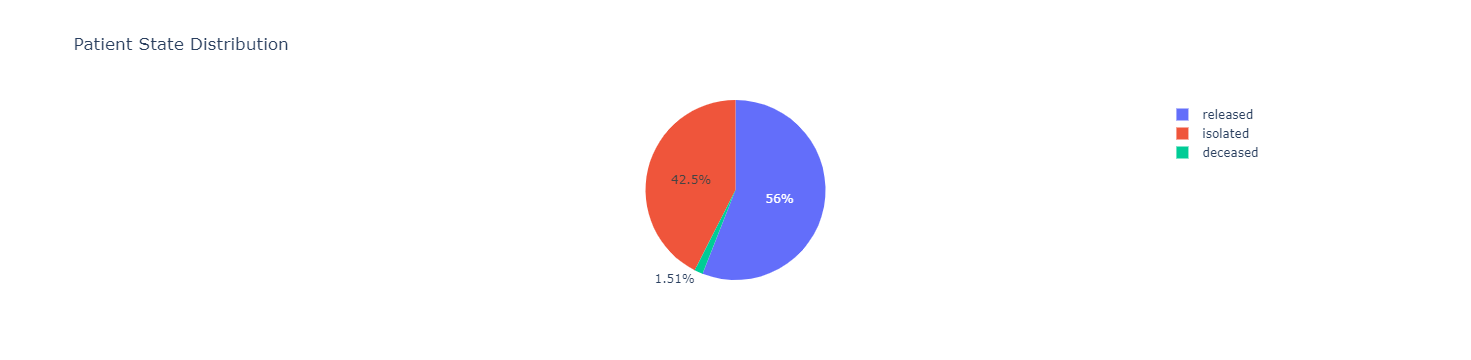

In [52]:
patient_state_no_null_df = patient_df['state'].dropna()

fig = px.pie(patient_state_no_null_df, names='state', title='Patient State Distribution')
fig.show()

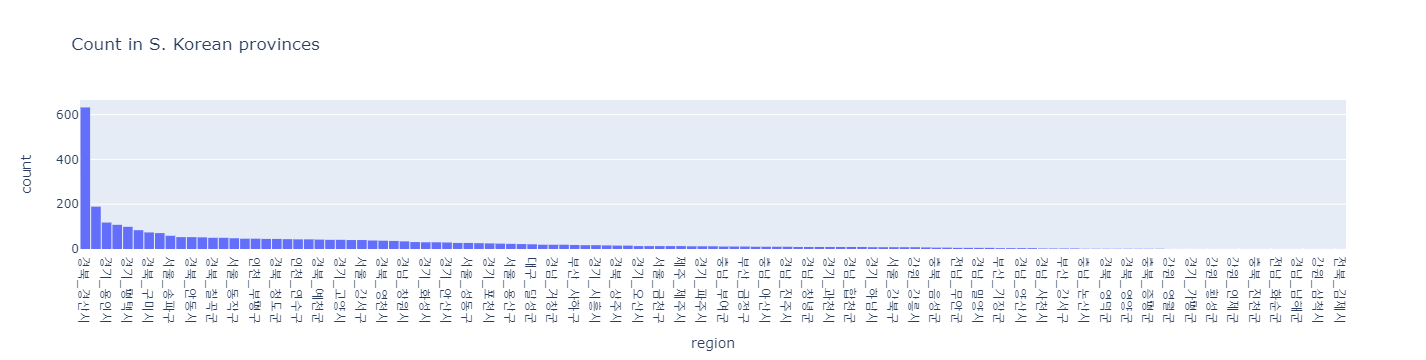

In [14]:
fig = px.histogram(patient_df, x="region", title='Count in S. Korean provinces', nbins=60).update_xaxes(categoryorder = 'total descending')
fig.update_layout(
    bargap=0.1)
fig.show()

In [66]:
patient_df_date_group = patient_df.groupby('confirmed_date')

In [67]:
patient_df_date_group['confirmed_date'].count()

confirmed_date
20200120    1
20200123    1
20200126    1
20200127    1
20200130    3
           ..
20200425    8
20200426    4
20200427    7
20200428    3
20200429    4
Name: confirmed_date, Length: 86, dtype: int64

In [68]:
confirmed_case_cumsum = list(patient_df_date_group['confirmed_date'].count().cumsum())

In [69]:
date_list = list(patient_df['confirmed_date'].dropna().unique())

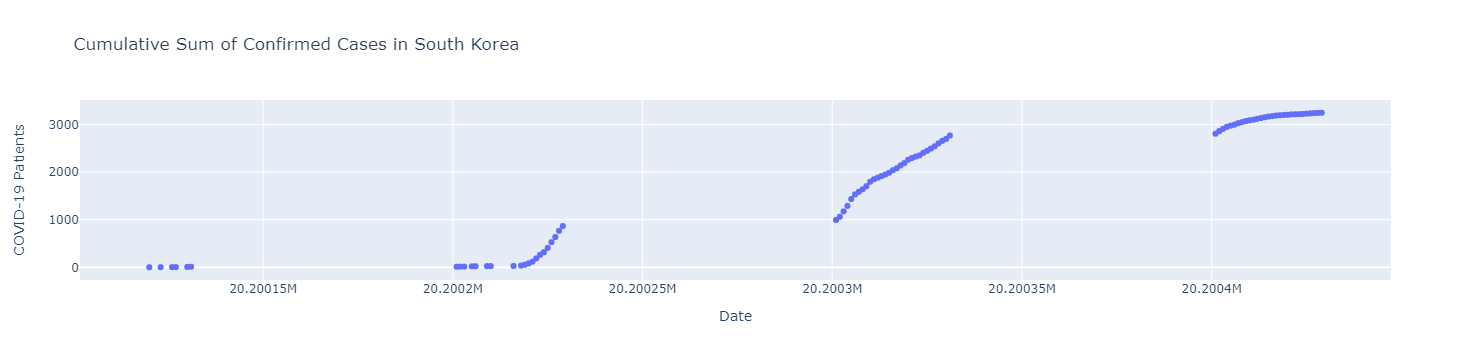

In [70]:
fig = go.Figure(data=go.Scatter(x=date_list, y=confirmed_case_cumsum, mode='markers'))
fig.update_layout(xaxis_title='Date', yaxis_title='COVID-19 Patients', title="Cumulative Sum of Confirmed Cases in South Korea")
fig.show()

### Outlier Analysis
##### outliers +/- 3 standard deviations outside of mean

In [26]:
def get_outliers(patient_df):
    
    outs = {}
    
    patient_df = patient_df.select_dtypes(include=['int64'])

    
    for col in patient_df.columns:
        
        # calculate summary statistics
        data_mean, data_std = np.mean(patient_df[col]), np.std(patient_df[col])
        
        # identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off
        
        # identify outliers
        outliers = [x for x in patient_df[col] if x < lower or x > upper]
        
        outs[col] = len(outliers)
        
    return outs

In [27]:
get_outliers(patient_df)

{'confirmed_date': 3,
 'patient_id': 0,
 'sun_time_hhmi': 52,
 'mini_tem_hhmi': 0,
 'max_tem_hhmi': 169,
 'max_wind_speed_hhmi': 0,
 'Num_Covid': 123,
 'Area_code': 0,
 'PM10max': 50,
 'PM25max': 28}

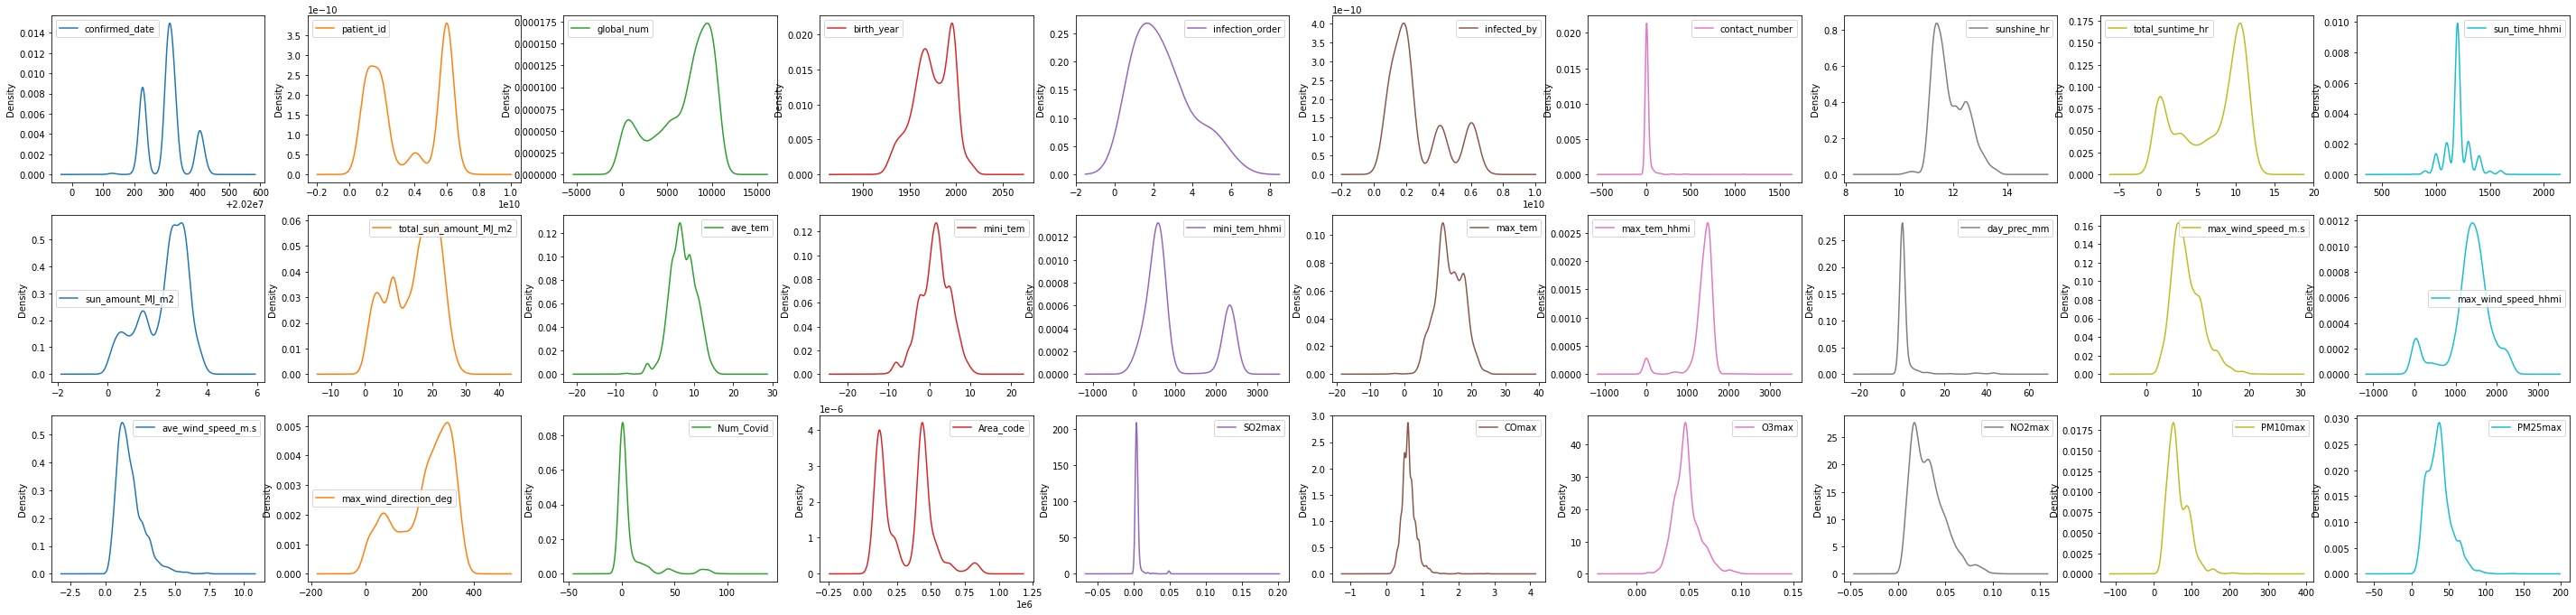

In [16]:
patient_df.plot(figsize=(50,40), kind='density', subplots=True, layout=(10,10), sharex=False);

In [ ]:
# # Density Plots:
# # With the excpetion of age, and day 
# (which we saw in the descriptive statistics), 
# all of the other variables show high concentrations of values around the mean, and significant outliers. 
# These will be examined later to see how they should be treated in the dataset.
# One plot we can look at with a little more detail, age.

In [7]:
patient_df = pd.read_csv('final_dataset_2.6.csv', encoding='cp949')
patient_df

,confirmed_date,region,patient_id,global_num,sex,birth_year,age,country,disease,infection_case,...,ave_wind_speed_m.s,max_wind_direction_deg,Num_Covid,Area_code,SO2max,COmax,O3max,NO2max,PM10max,PM25max
0,20200120,인천_부평구,1400000001,1.0,female,1985.0,30s,China,NaN,overseas inflow,...,0.8,246.2,0,823803,0.005,0.9,0.030,0.053,70,50
1,20200123,서울_강서구,1000000001,2.0,male,1964.0,50s,Korea,NaN,overseas inflow,...,1.8,0.0,0,111212,0.014,1.2,0.049,0.059,88,49
2,20200126,경기_고양시,2000000001,3.0,male,1966.0,50s,Korea,NaN,overseas inflow,...,1.0,84.4,0,131383,0.004,0.8,0.018,0.036,56,36
3,20200127,경기_평택시,2000000002,4.0,male,1964.0,50s,Korea,NaN,overseas inflow,...,2.0,47.8,0,131342,0.003,0.2,0.040,0.015,14,4
4,20200130,서울_중랑구,1000000002,5.0,male,1987.0,30s,Korea,NaN,overseas inflow,...,1.6,340.3,1,111151,0.003,0.7,0.026,0.044,27,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,20200428,충남_천안시,4100000143,NaN,male,1981.0,30s,Korea,NaN,overseas inflow,...,1.6,245.3,0,534115,0.005,0.5,0.066,0.033,46,29
3244,20200429,경기_성남시,2000000677,NaN,female,1999.0,20s,Korea,NaN,overseas inflow,...,0.9,182.8,0,131121,0.004,0.6,0.091,0.035,54,39
3245,20200429,경북_안동시,6011000051,NaN,female,1980.0,40s,Korea,NaN,etc,...,1.2,191.4,0,437141,0.003,0.5,0.089,0.022,65,31
3246,20200429,경북_안동시,6011000052,NaN,female,2011.0,0s,Korea,NaN,etc,...,1.2,191.4,0,437141,0.003,0.5,0.089,0.022,65,31


In [13]:
def statistical_information(patient_df):
    return patient_df.describe().round(2).T.style.bar(subset=['mean'], color='cornflowerblue')\
                                .background_gradient(subset=['std'], cmap='Reds')\
                                .background_gradient(subset=['50%'], cmap='coolwarm') 
statistical_information(patient_df)

,count,mean,std,min,25%,50%,75%,max
confirmed_date,3248.000000,20200303.570000,59.070000,20200120.000000,20200229.000000,20200308.000000,20200325.000000,20200429.000000
patient_id,3248.000000,3601881882.520000,2190480407.480000,1000000001.000000,1475000023.750000,3001000006.500000,6001000547.250000,7000000013.000000
global_num,2137.000000,6783.040000,3263.480000,1.000000,4625.000000,7928.000000,9459.000000,10758.000000
birth_year,2812.000000,1975.180000,20.250000,1916.000000,1961.000000,1975.000000,1994.000000,2020.000000
infection_order,29.000000,2.480000,1.450000,1.000000,1.000000,2.000000,3.000000,6.000000
infected_by,808.000000,2694491493.490000,1743859962.990000,1000000002.000000,1300000003.000000,2000000205.000000,4100000008.000000,7000000009.000000
contact_number,625.000000,15.880000,56.070000,0.000000,2.000000,4.000000,13.000000,1091.000000
sunshine_hr,3248.000000,11.860000,0.610000,10.100000,11.400000,11.700000,12.300000,13.700000
total_suntime_hr,3248.000000,6.870000,4.210000,0.000000,2.800000,8.850000,10.520000,12.500000
sun_time_hhmi,3248.000000,1204.000000,115.140000,800.000000,1200.000000,1200.000000,1200.000000,1700.000000
